### $\textbf{Assignment}$
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

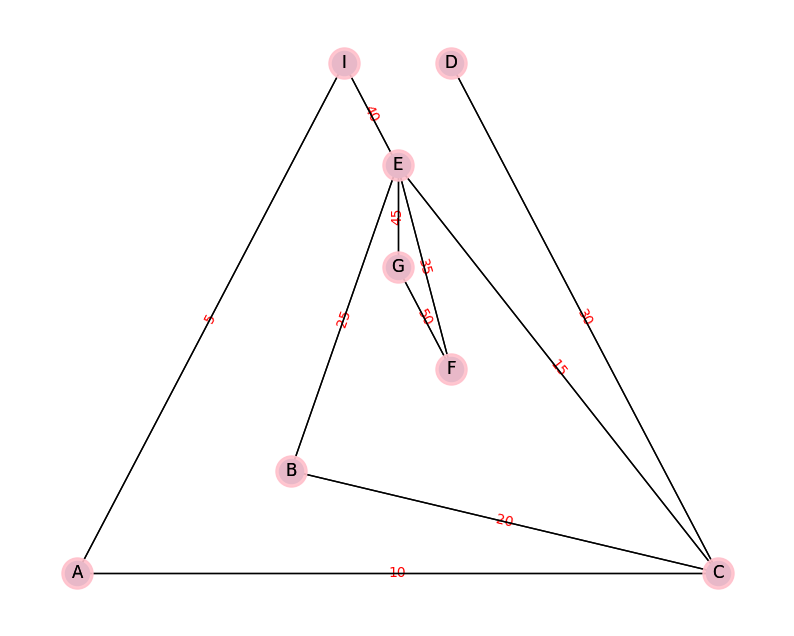

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

### $\textbf{Kruskal's Algorithm}$

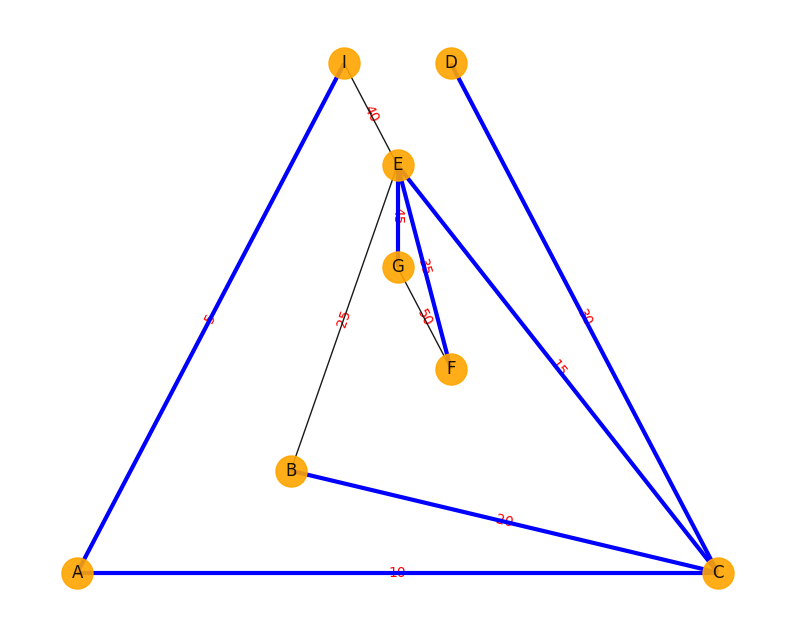

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

def kruskal(graph):
    sorted_edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    sets = {node: {node} for node in graph.nodes()}
    mst = nx.Graph()
    for edge in sorted_edges:
        u, v, weight = edge
        set_u = sets[u]
        set_v = sets[v]
        if set_u != set_v:
            mst.add_edge(u, v, weight=weight['weight'])
            # Merge sets
            set_u.update(set_v)
            for node in set_v:
                sets[node] = set_u
    return mst

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}),
    ("A", "I", {'weight': 5}),
    ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}),
    ("C", "D", {'weight': 30}),
    ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}),
    ("E", "F", {'weight': 35}),
    ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)
mst = kruskal(G)
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_color='red')
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='orange', alpha=0.9, width=1, edge_color='black')
nx.draw_networkx_edges(mst, pos=pos, edge_color='blue', width=3)
plt.show()

<b>Solution: </b>

| Iteration Number | Edge Considered | Weight | Action Taken |
| :-: | :-: | :-: | :-: |
| 1 | (A, I) | 5 | added |
| 2 | (A, C) | 10 | added |
| 3 | (C, E) | 15 | added |
| 4 | (B, C) | 20 | added |
| 5 | (B, E) | 25 | not added |
| 6 | (C, D) | 30 | added |
| 7 | (E, F) | 35 | added |
| 8 | (E, I) | 40 | not added |
| 9 | (E, G) | 45 | added |
| 10 | (F, G) | 50 | not added |

### $\textbf{Prim's Algorithm}$

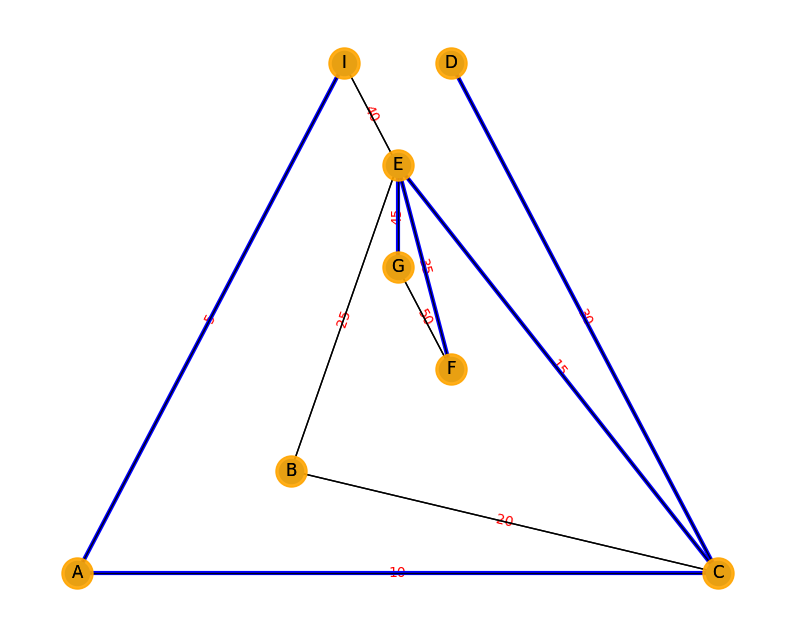

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

def min_edge(edges, visited):
    min_weight = float('inf')
    min_edge = None
    for edge in edges:
        if edges[edge] < min_weight and edge[1] not in visited:
            min_weight = edges[edge]
            min_edge = edge
    return min_edge

def prim(G, pos):
    MST = nx.Graph()
    visited = set()
    start_node = list(G.nodes())[0]  
    visited.add(start_node)
    while len(visited) < len(G.nodes()):
        available_edges = {(edge[0], edge[1]): G.edges[edge].get('weight', 1) for edge in G.edges() if edge[0] in visited or edge[1] in visited}
        min_e = min_edge(available_edges, visited)
        if min_e is None:
            break
        MST.add_edge(min_e[0], min_e[1], weight=available_edges[min_e])
        visited.add(min_e[1])
    return MST

seed = 55
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)
MST = prim(G, pos)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(MST, pos=pos, edge_color='blue', width=3) 
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='orange', alpha=0.9,
    with_labels=True)
plt.show()

<b>Solution: </b>

| Iteration Number | Vertex Added | Edge Added | Weight |
| :-: | :-: | :-: | :-: |
| 0 | I |  |  |
| 1 | A | (I, A) | 5 |
| 2 | C | (A, C) | 10 |
| 3 | E | (C, E) | 15 |
| 4 | B | (C, B) | 20 |
| 5 | D | (C, D) | 30 |
| 6 | F | (E, F) | 35 |
| 7 | G | (E, G) | 45 |

### $\textbf{Dijkstra's Shortest Path Algorithm}$

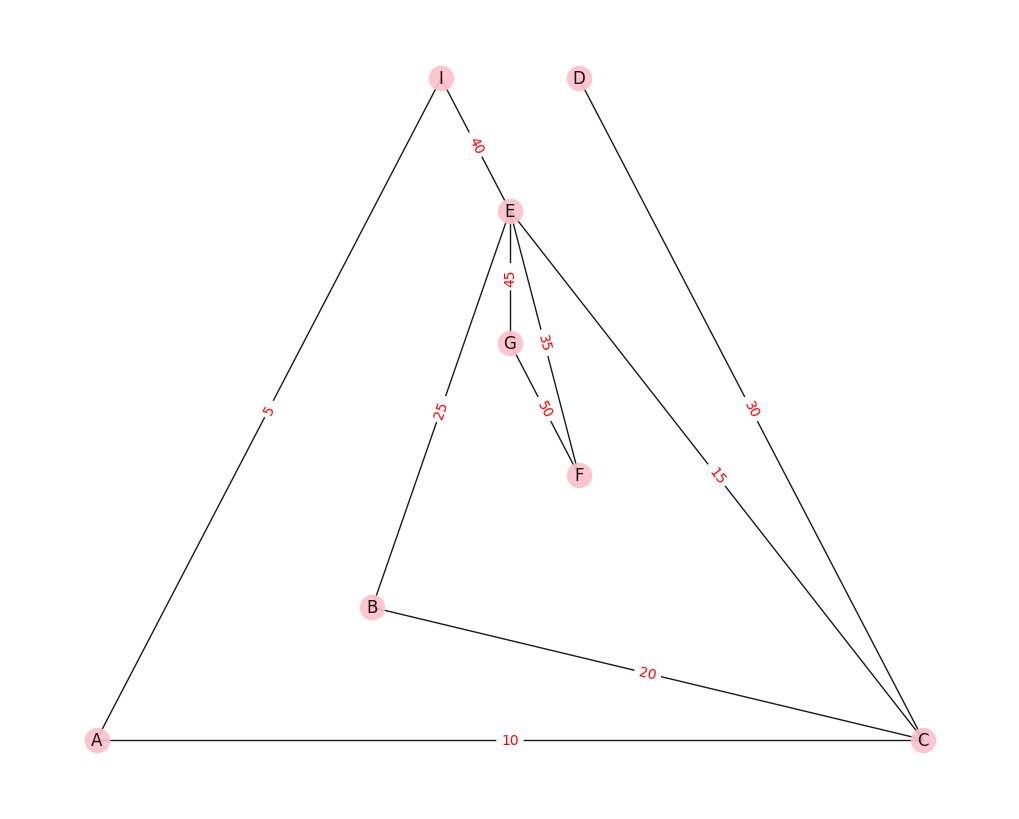

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start] = 0
    shortest_paths = {}
    priority_queue = [(0, start)]
    while priority_queue:
        current_distance, current_node = min(priority_queue)
        priority_queue.remove((current_distance, current_node))
        shortest_paths[current_node] = current_distance
        for neighbor in graph.neighbors(current_node):
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                priority_queue.append((distance, neighbor))
    return shortest_paths

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)

weights = {("A","C"): 10, ("A","I"): 5, ("C","B"): 20, ("C","E"): 15, ("C","D"): 30,
           ("B","E"): 25, ("I","E"): 40, ("E","F"): 35, ("F","G"): 50, ("G","E"): 45}
for edge in G.edges():
    if edge in weights:
        G.edges[edge]['weight'] = weights[edge]
    else:
        G.edges[edge]['weight'] = 0  # 

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color='pink', edge_color='black', width=1, alpha=0.9)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color='red')
plt.show()

<b> Shortest distances from node A : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 0 |
| B | 30 |
| C | 10 |
| D | 40 |
| E | 25 |
| F | 60 |
| G | 70 |
| I | 5 |

<br>

<b> Shortest distances from node B : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 30 |
| B | 0 |
| C | 20 |
| D | 50 |
| E | 25 |
| F | 60 |
| G | 70 |
| I | 35 |

<br>

<b> Shortest distances from node C : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 10 |
| B | 20 |
| C | 0 |
| D | 30 |
| E | 15 |
| F | 50 |
| G | 60 |
| I | 15 |

<br>

<b> Shortest distances from node D : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 40 |
| B | 50 |
| C | 30 |
| D | 0 |
| E | 45 |
| F | 80 |
| G | 90 |
| I | 45 |

<br>

<b> Shortest distances from node E : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 25 |
| B | 25 |
| C | 15 |
| D | 45 |
| E | 0 |
| F | 35 |
| G | 45 |
| I | 30 |

<br>

<b> Shortest distances from node F : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 60 |
| B | 60 |
| C | 50 |
| D | 80 |
| E | 35 |
| F | 0 |
| G | 50 |
| I | 65 |

<br>

<b> Shortest distances from node G : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 70 |
| B | 70 |
| C | 60 |
| D | 90 |
| E | 45 |
| F | 50 |
| G | 0 |
| I | 75 |

<br>

<b> Shortest distances from node I : </b>

| Destination Node | Shortest Distance (Lowest Total Weight) |
| :-: | :-: |
| A | 5 |
| B | 35 |
| C | 15 |
| D | 45 |
| E | 30 |
| F | 65 |
| G | 75 |
| I | 0 |

<br>